In [34]:
# Step 1: Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Step 2: Load the dataset
data = pd.read_csv('C:/Users/TEMP.NDOCY.000/Desktop/Employee_Compensation_SF.csv')

# Display data information and preview the first few rows
print(data.info())
print(data.head())

# Step 3: Handle missing values
# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Fill missing numerical values with the mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Drop rows with missing 'Year Type' or 'Organization Group'
data.dropna(subset=['Year Type', 'Organization Group'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291825 entries, 0 to 291824
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    291825 non-null  int64  
 1   Year Type                291825 non-null  object 
 2   Year                     291825 non-null  int64  
 3   Organization Group Code  291825 non-null  int64  
 4   Organization Group       291825 non-null  object 
 5   Department Code          291825 non-null  object 
 6   Department               291825 non-null  object 
 7   Union Code               291782 non-null  float64
 8   Union                    291782 non-null  object 
 9   Job Family Code          291780 non-null  object 
 10  Job Family               291780 non-null  object 
 11  Job Code                 291825 non-null  object 
 12  Job                      291825 non-null  object 
 13  Employee Identifier      291825 non-null  int64  
 14  Sala

In [36]:
# Step 4: Remove duplicates
data.drop_duplicates(inplace=True)

In [37]:
# Step 5: Convert data types (if necessary)
# Convert 'Year' to integer
data['Year'] = data['Year'].astype(int)


In [38]:
# Step 6: Normalize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')



In [39]:
# Step 7: Create a target variable for the classification task
# Target: If the 'Retirement' is below a certain threshold, label it as 'Withdraw_Funds'
retirement_threshold = 10000  # Example threshold
data['withdraw_funds'] = (data['retirement'] < retirement_threshold).astype(int)



In [40]:
# Step 8: Select features and target variable
X = data[['salaries', 'overtime', 'other_salaries', 'total_salary', 'retirement', 
           'health/dental', 'other_benefits', 'total_benefits', 'total_compensation']]
y = data['withdraw_funds']



In [41]:
# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [42]:
# Step 10: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [43]:
# Step 11: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [44]:
# Step 12: Evaluate the model using the ROC curve
plt.figure(figsize=(8, 6))



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [45]:
# Predict the probabilities of the positive class
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


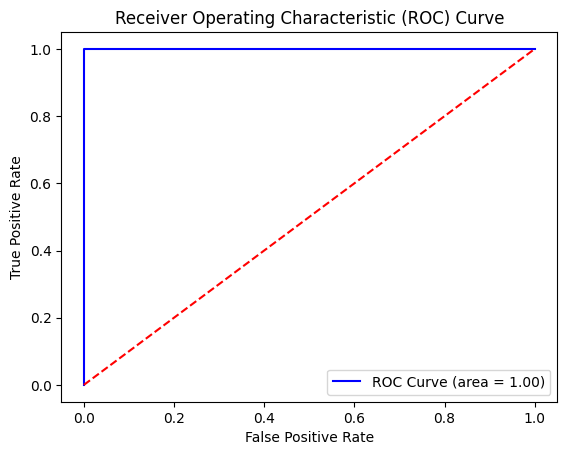

ROC AUC Score: 1.00


In [46]:

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Optional: Print the AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")